In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.model_selection import GridSearchCV

In [44]:
data = pd.read_csv("mushrooms.csv")

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [46]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [47]:
answer = data['class']
del data['class']

In [48]:
data['cap-shape'].unique()

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

In [49]:
data['cap-shape'].value_counts()

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

In [50]:
dummies = pd.get_dummies(data)

In [51]:
dummies.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [52]:
X_train, X_test, y_train, y_test = train_test_split(dummies, answer, random_state=0)

## hyperparameter tuning

In [75]:
max_depth = [2, 4, 6, 8, 10]
max_features = [2, 4, 6, 8, 10, 12]
min_samples_leaf = [2, 4, 6, 8]
max_leaf_nodes = [2, 4, 6, 8, 10]

param_grid = [
    {'max_depth' : max_depth, 'max_features' : max_features,
    'min_samples_leaf' : min_samples_leaf,
    'max_leaf_nodes' : max_leaf_nodes}
]

model = DecisionTreeClassifier()

### 그리드서치

In [76]:
grid_search = GridSearchCV(model, param_grid = param_grid,
                          cv = 5, verbose = 2, n_jobs =-1, return_train_score=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 896 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 2520 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed:   13.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'max_depth': [2, 4, 6, 8, 10, 12],
                   

In [77]:
grid_search.best_params_

{'max_depth': 8,
 'max_features': 10,
 'max_leaf_nodes': 10,
 'min_samples_leaf': 6}

In [78]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=10, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [79]:
model = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=10, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [80]:
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=10, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [101]:
model.score(X_train,y_train)

0.9863778106023305

In [102]:
model.score(X_test, y_test)

0.9857213195470211

In [82]:
pred = model.predict(X_test)

In [61]:
y_test

380     p
3641    e
273     e
1029    e
684     e
       ..
1859    e
6181    p
6228    p
554     e
7025    e
Name: class, Length: 2031, dtype: object

### 특성 중요도

In [62]:
import matplotlib.pyplot as plt

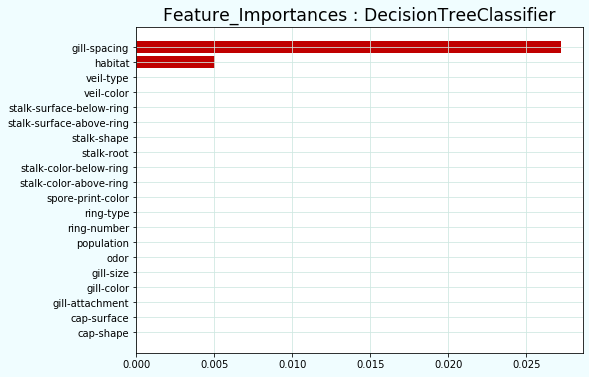

In [100]:
mpotances = model.feature_importances_
feature_list = list(zip(model.feature_importances_,data.columns))
feature_list.sort(reverse=True)
feature_list=feature_list[:20]
feature_list.sort(reverse=False)
feature_df = pd.DataFrame(feature_list,columns=["score","feature"])
plt.figure(figsize=(8,6),facecolor="#F0FDFF")
plt.title("Feature_Importances : {}".format(str(model).split("(")[0]), fontsize="xx-large")
plt.barh(feature_df["feature"],feature_df["score"],color="#C00000")
plt.grid(color="#CFE8E1")

### 교차검증

In [97]:
scores = cross_val_score(model,dummies, answer, cv = 5)

In [98]:
print('교차검증 점수 : ' , scores)
print('교차검증 평균 점수 : ' , scores.mean())

교차검증 점수 :  [0.73230769 0.99938462 0.80123077 0.99938462 0.75431034]
교차검증 평균 점수 :  0.8573236074270557
